# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 10.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020


In [1]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (COMP)
# BETHEL 70219

---

## Loading Data:

All data has been downloaded via the cds-api in a similar manner like depicted in 'IGRA_Comparison_Request.ipyn'. 

In [3]:
files = glob.glob('IGRA_70219/*/*.csv')
files_h = glob.glob('IGRA_H_70219/*/*.csv')
print(len(files) == len(files_h))

True


In [4]:
# IGRA and its harmonized version
for i in range(len(files)):
    if i == 0:
        igra = pandas.read_csv(files[i], header=12)
        igrah = pandas.read_csv(files_h[i], header=12)
    else:
        igra = igra.append(pandas.read_csv(files[i], header=12))
        igrah = igrah.append(pandas.read_csv(files_h[i], header=12))

In [5]:
# COMP - Comprehensive upper-air observation network from 1905 to present
files = glob.glob('COMP_70219/*/temperature.csv')
for i in range(len(files)):
    if i == 0:
        comp = pandas.read_csv(files[i])
    else:
        comp = comp.append(pandas.read_csv(files[i]))

In [6]:
comp = comp[comp.time < '2018-10'] # igra data is only available up to Oct.2018, so we shorten the comp data

## Getting the data to the same length for comparison (IGRA_H vs COMP) on 4 standard pressure leveles:
there are more ascents in the COMP data, it will be reduced to only ascents starting at 00:00 and 12:00. <br>
Sometimes the ascents were not exactly at 00:00 or 12:00, but were assigned to those profiles.<br>
In the remaining data there are some points in time, which are not in both datasets - those will be removed too.


In [7]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
missing_i = []
missing_c = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    datai = igra[igra.air_pressure == i]
    datai.report_timestamp = pandas.to_datetime(datai.report_timestamp, utc=True)
    datah = igrah[igrah.air_pressure == i]
    datah.report_timestamp = pandas.to_datetime(datah.report_timestamp, utc=True)
    datac = comp[comp.plev == i]
    datac.time = pandas.to_datetime(datac.time, utc=True)
    datar = (datac[datac.time.dt.hour == 12].append(datac[datac.time.dt.hour == 0])).sort_values('time')
    datar = datar[datar.time.dt.minute == 0]
    datar = datar[datar.time.dt.second == 0]
    print('Length of COMP: ' + str(len(datac.time)))
    print('Missing Values of COMP: ' + str(datac.ta.isnull().sum()))
    print('Length of reduced COMP: ' + str(len(datar.time)))
    print('Missing Values of reduced COMP: ' + str(datar.ta.isnull().sum()))
    print('Length of IGRA: ' + str(len(datai.report_timestamp)))
    print('Missing Values of IGRA: ' + str(datai.air_temperature.isnull().sum()))
    print('Length of IGRA_H: ' + str(len(datah.report_timestamp)))
    print('Missing Values of IGRA_H: ' + str(datah.air_temperature.isnull().sum()))
    print('Length difference of reduced COMP to IGRA: ' + str(len(datar.time)-len(datai.report_timestamp)))
    print('Length difference of reduced COMP to IGRA_H: ' + str(len(datar.time)-len(datah.report_timestamp)))
    missingtimes1 = []
    for i in datar.time:
        if len(datah[datah.report_timestamp == i]) <1: # -> checking if timestamp is also in the other dataset
            missingtimes1.append(i)
            datar = datar[datar.time != i] # -> kicking it out, if not
    print('Missing Timestamps in IGRA_H relative to reduced COMP: ' + str(len(missingtimes1)))
    missingtimes2 = []
    for i in datah.report_timestamp:
        if len(datar[datar.time == i]) <1: # -> checking if timestamp is also in the other dataset
            missingtimes2.append(i)
            datah = datah[datah.report_timestamp != i] # -> kicking it out, if not
            datai = datai[datai.report_timestamp != i] # -> kicking it out, if not
    print('Missing Timestamps in reduced COMP relative to IGRA_H: ' + str(len(missingtimes2)))
    comp_adjusted.append(datar)
    igra_h_adjusted.append(datah)
    igra_adjusted.append(datai)
    missing_i.append(len(missingtimes2))
    missing_c.append(len(missingtimes1))

--- 
pressure level: 10000


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Length of COMP: 42537
Missing Values of COMP: 0
Length of reduced COMP: 28218
Missing Values of reduced COMP: 0
Length of IGRA: 28195
Missing Values of IGRA: 0
Length of IGRA_H: 28195
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: 23
Length difference of reduced COMP to IGRA_H: 23
Missing Timestamps in IGRA_H relative to reduced COMP: 1412
Missing Timestamps in reduced COMP relative to IGRA_H: 1389
--- 
pressure level: 20000
Length of COMP: 43086
Missing Values of COMP: 0
Length of reduced COMP: 28570
Missing Values of reduced COMP: 0
Length of IGRA: 28579
Missing Values of IGRA: 0
Length of IGRA_H: 28579
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: -9
Length difference of reduced COMP to IGRA_H: -9


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 1437
Missing Timestamps in reduced COMP relative to IGRA_H: 1446
--- 
pressure level: 50000
Length of COMP: 43713
Missing Values of COMP: 0
Length of reduced COMP: 29010
Missing Values of reduced COMP: 0
Length of IGRA: 29026
Missing Values of IGRA: 0
Length of IGRA_H: 29026
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: -16
Length difference of reduced COMP to IGRA_H: -16


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 1452
Missing Timestamps in reduced COMP relative to IGRA_H: 1468
--- 
pressure level: 85000
Length of COMP: 43748
Missing Values of COMP: 0
Length of reduced COMP: 29049
Missing Values of reduced COMP: 0
Length of IGRA: 29063
Missing Values of IGRA: 0
Length of IGRA_H: 29063
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: -14
Length difference of reduced COMP to IGRA_H: -14


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 1452
Missing Timestamps in reduced COMP relative to IGRA_H: 1466


## Missing data in the data sets

Now we display the missing data in the datasets, those bars labeled as COMP depict the data which is missing in the COMP data set but is available in the IGRA data set; and vice versa.

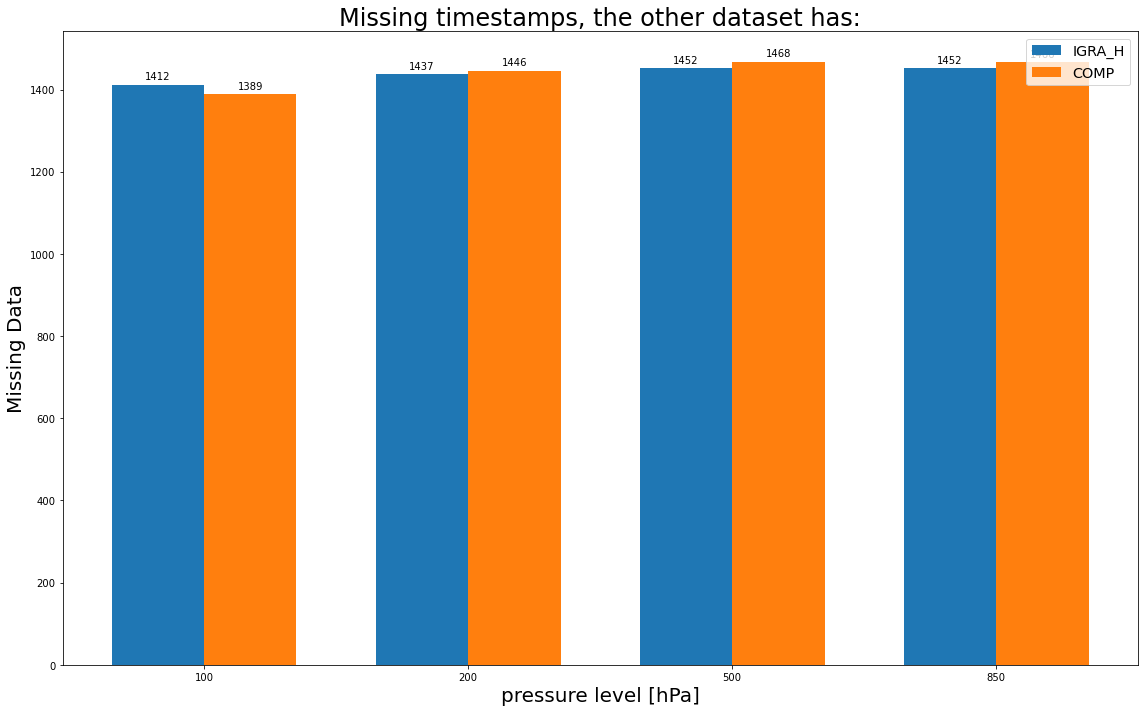

In [8]:
pressl = [100, 200, 500, 850]
x = np.arange(len(pressl))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, missing_c, width, label='IGRA_H')
rects2 = ax.bar(x + width/2, missing_i, width, label='COMP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Missing Data')
ax.set_xlabel('pressure level [hPa]')
ax.set_title('Missing timestamps, the other dataset has:')
ax.set_xticks(x)
ax.set_xticklabels(pressl)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

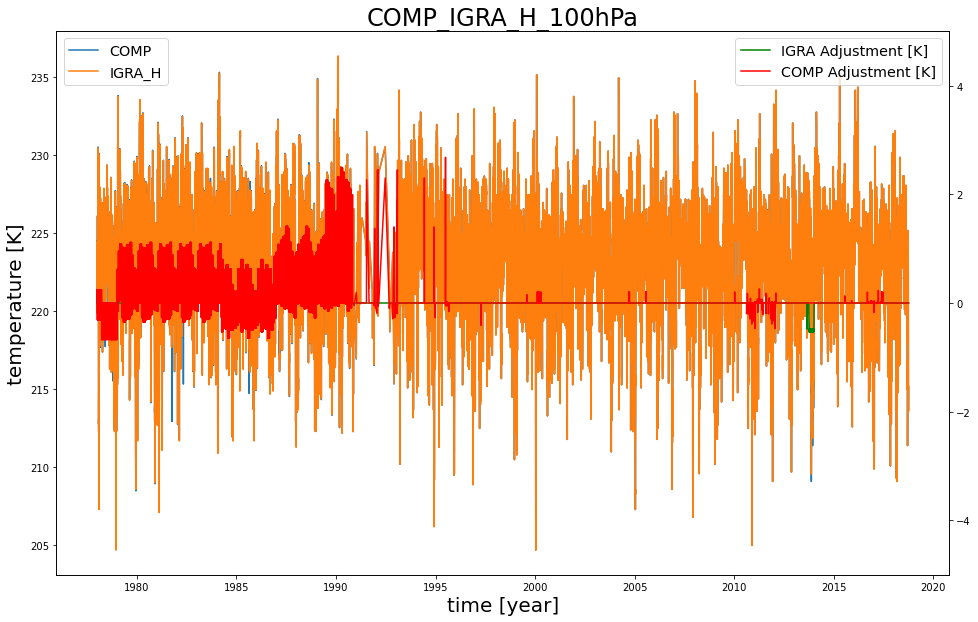

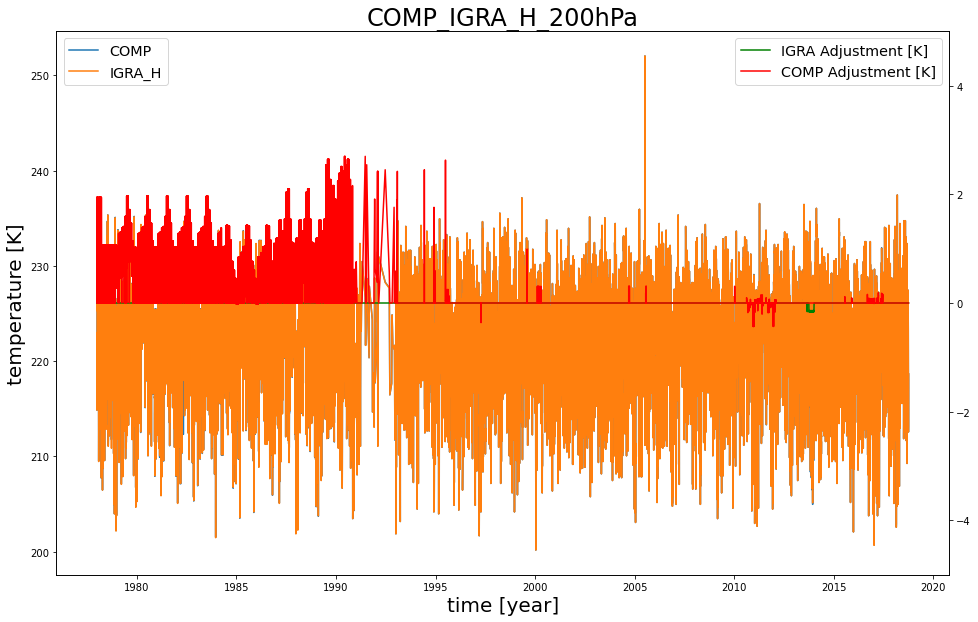

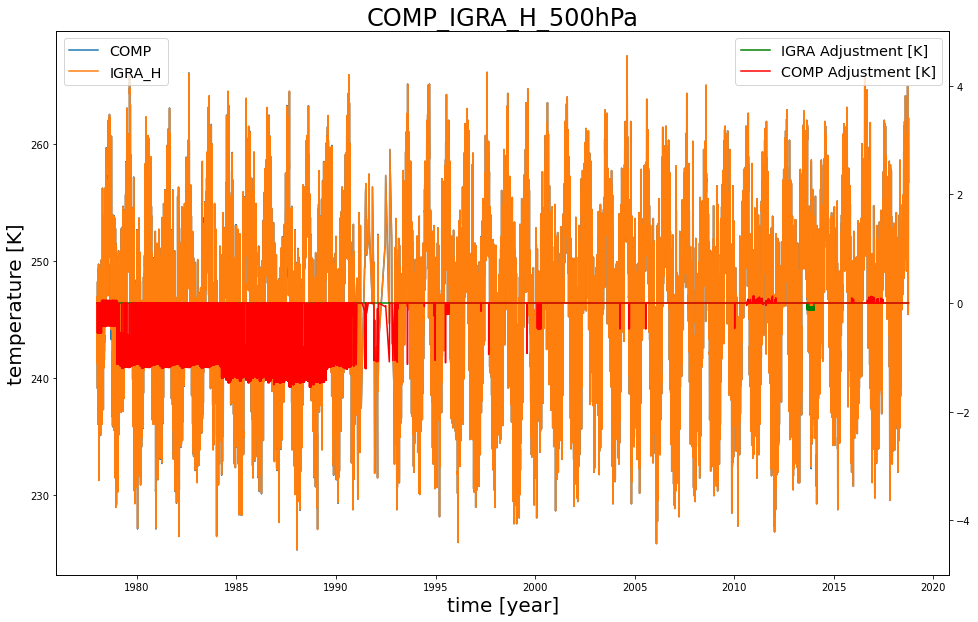

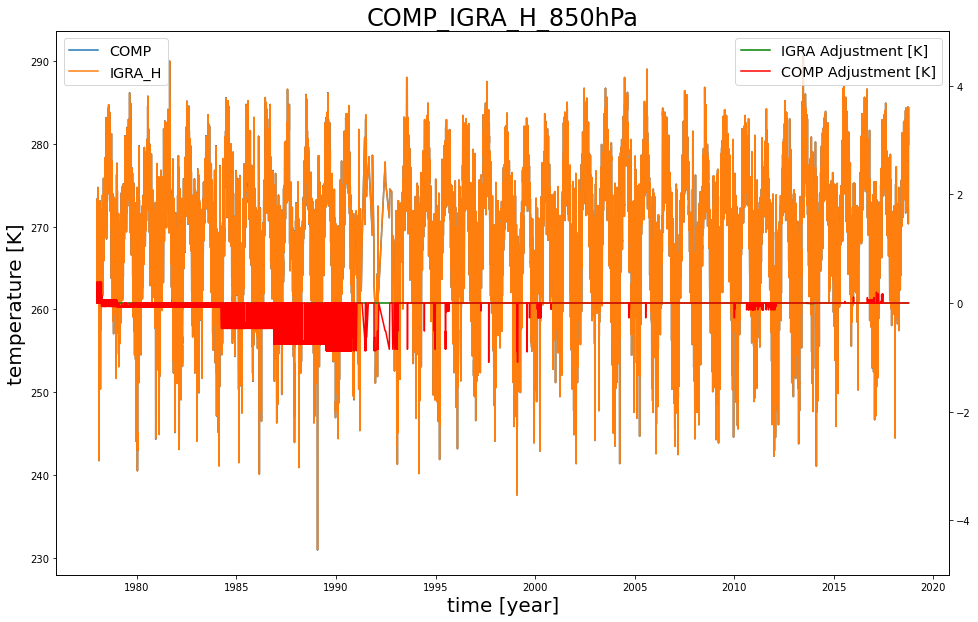

In [9]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP')
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H')
    ax2 = ax1.twinx()
    ax2.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', c='green')
    ax2.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', c='red')

    ax2.set_ylim(-5,5)
    ax2.legend(loc='best')

    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP_IGRA_H_'+str(preslist[i])+'hPa')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


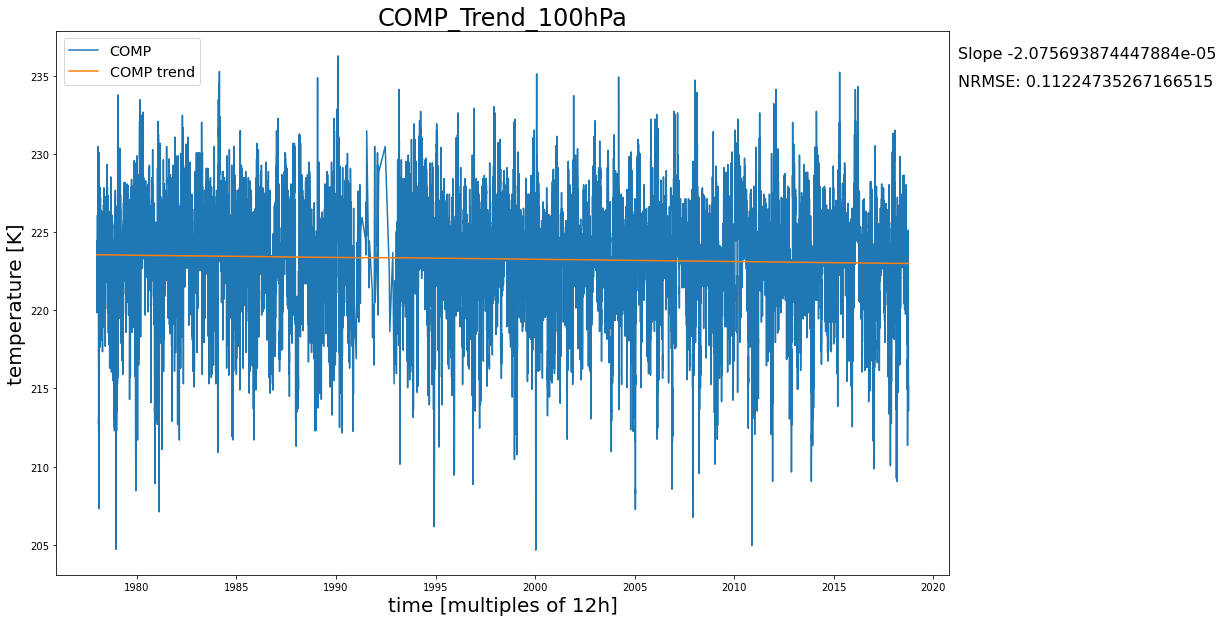

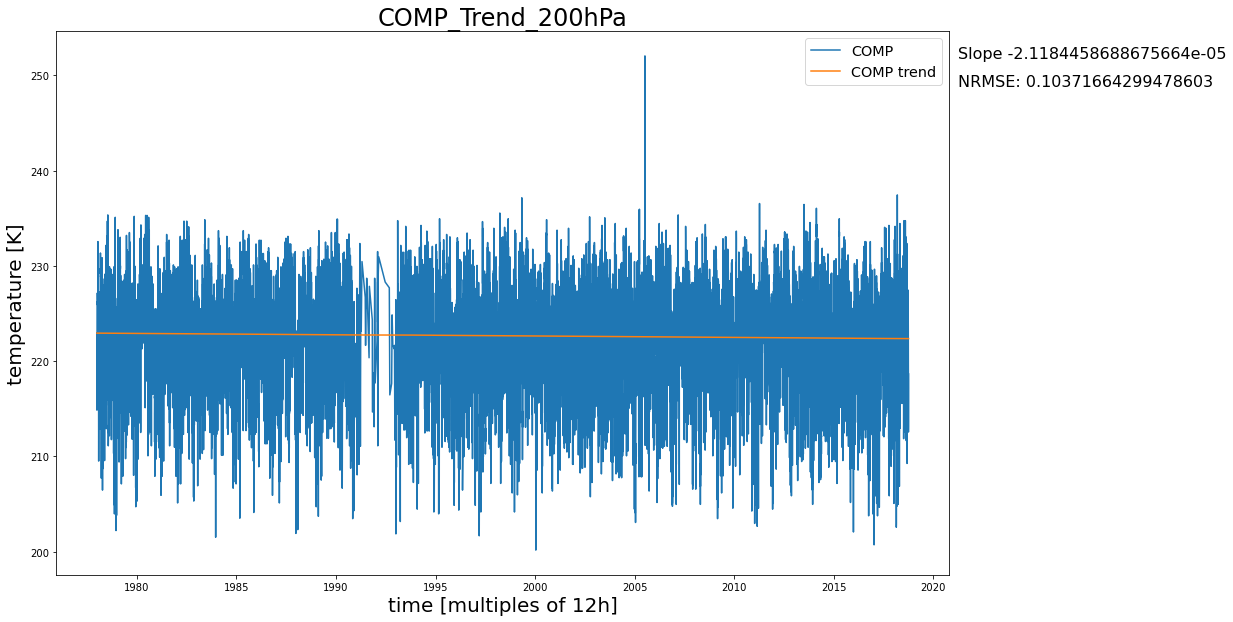

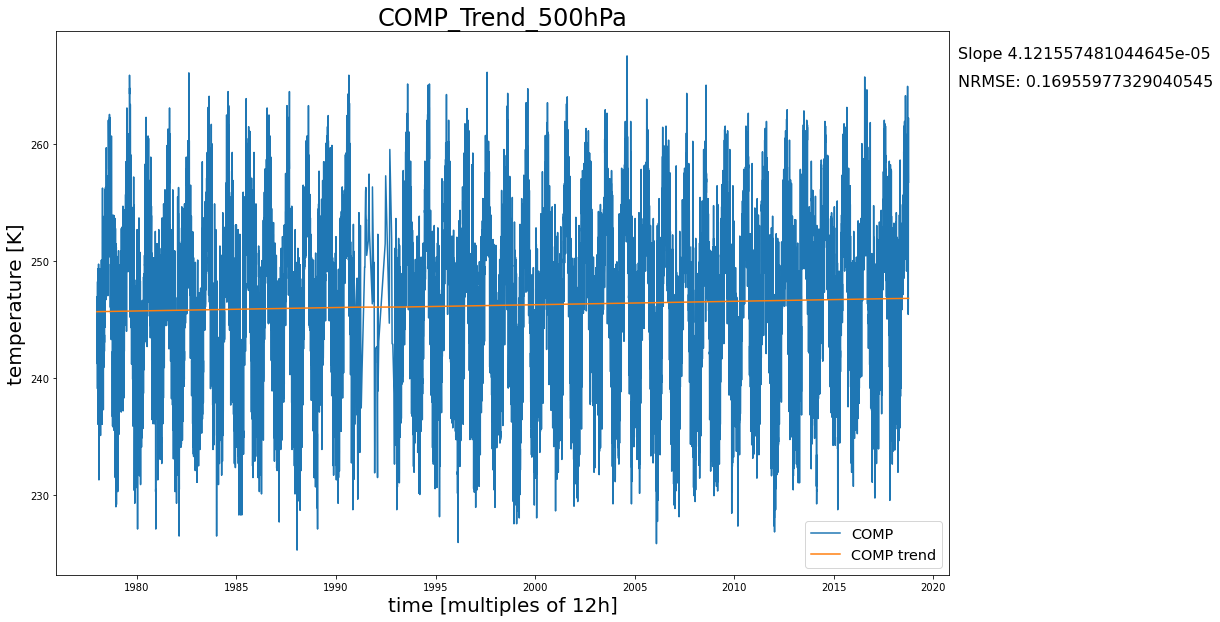

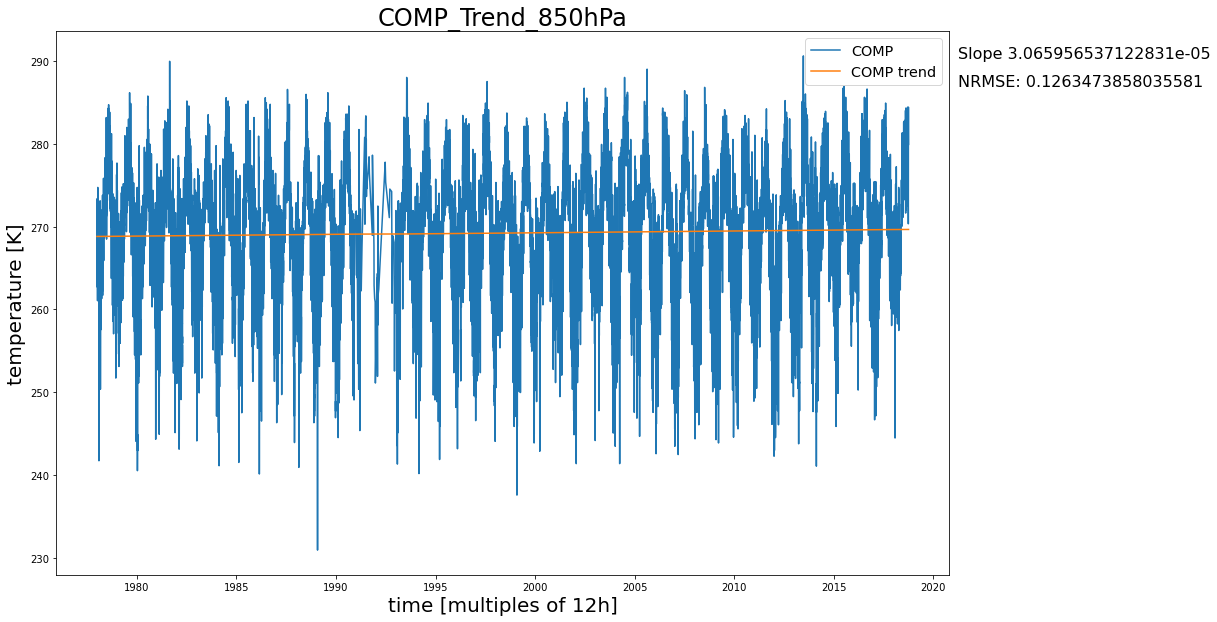

In [10]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP')
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_Trend_'+str(preslist[i])+'hPa')
    ax1.text(1.01, 0.95, 'Slope ' + str(coefficients[0]), transform=ax1.transAxes, fontsize = 16)
    ax1.text(1.01, 0.90, 'NRMSE: ' + str(nrmse), transform=ax1.transAxes, fontsize = 16)
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)
    

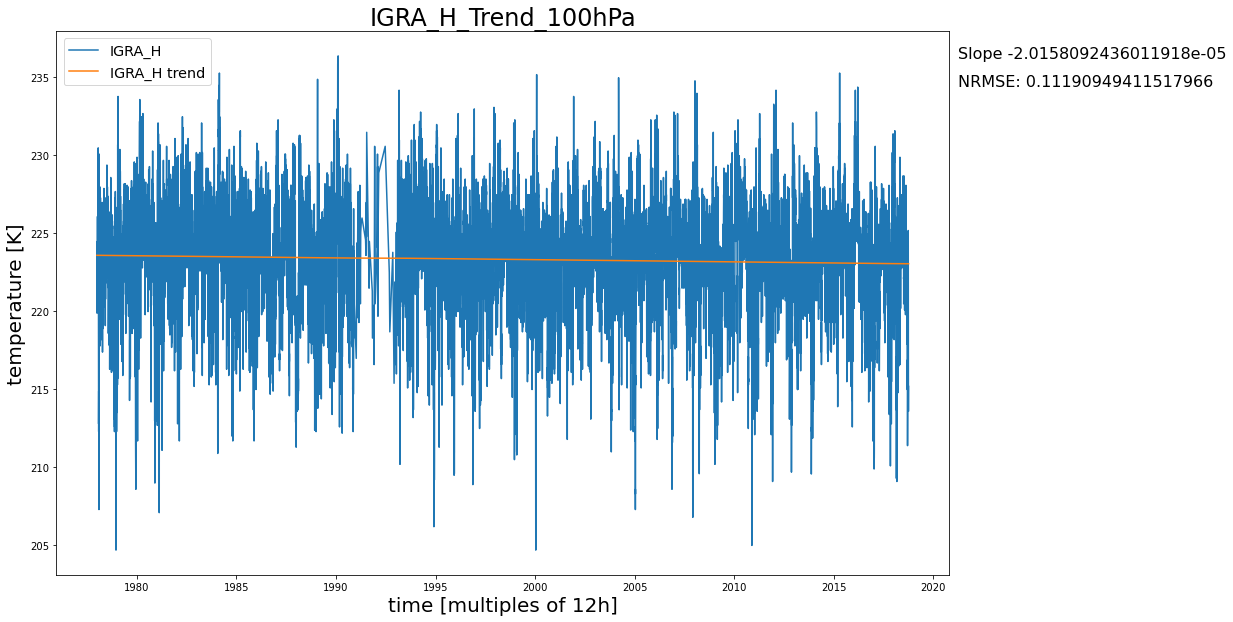

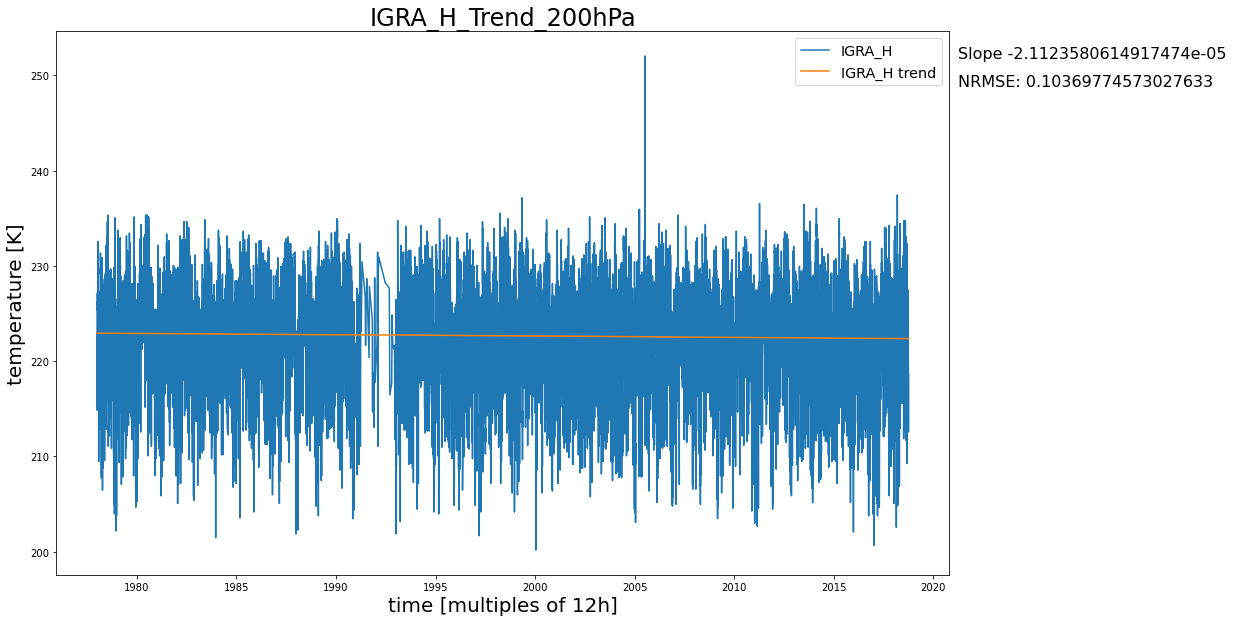

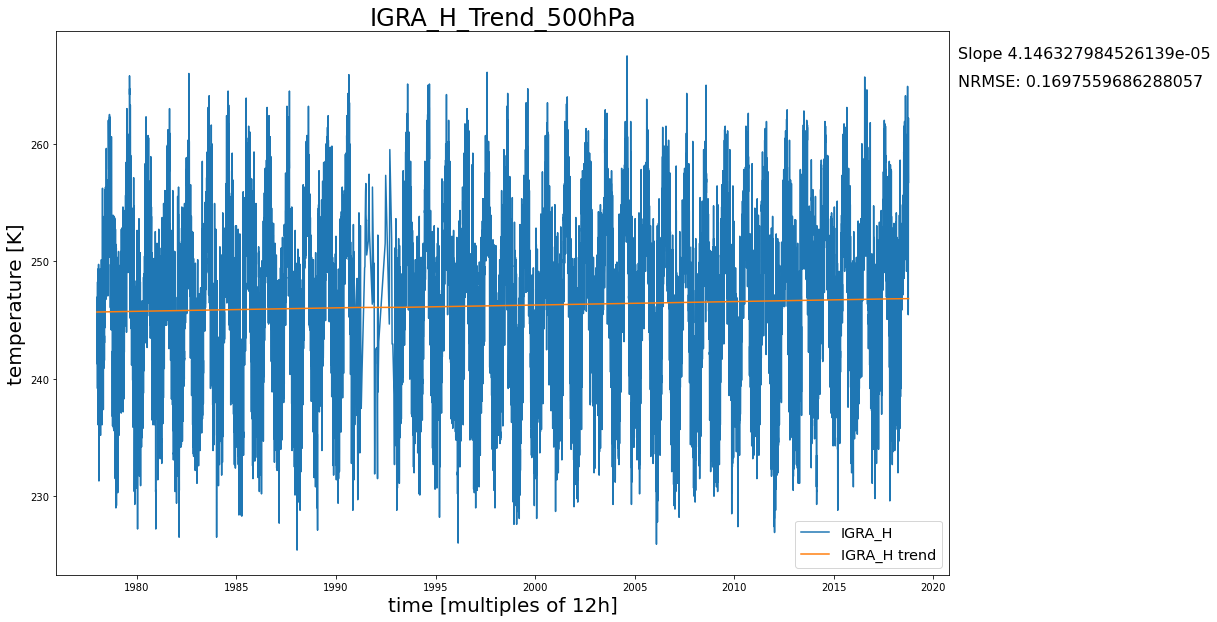

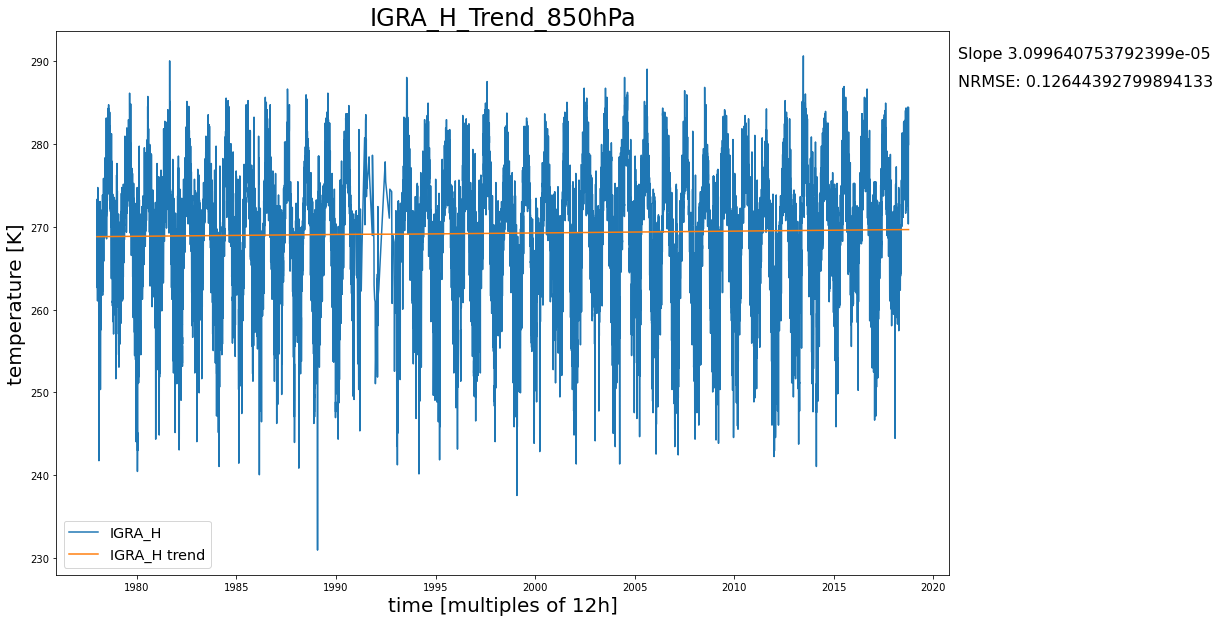

In [11]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    b = igra_h_adjusted[i]
    xax = np.asarray(b.report_timestamp)
    
    selected = b.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H')
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H_Trend_'+str(preslist[i])+'hPa')
    ax1.text(1.01, 0.95, 'Slope ' + str(coefficients[0]), transform=ax1.transAxes, fontsize = 16)
    ax1.text(1.01, 0.90, 'NRMSE: ' + str(nrmse), transform=ax1.transAxes, fontsize = 16)
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [12]:
comp_ma = []
igra_h_ma = []
igra_ma = []
for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

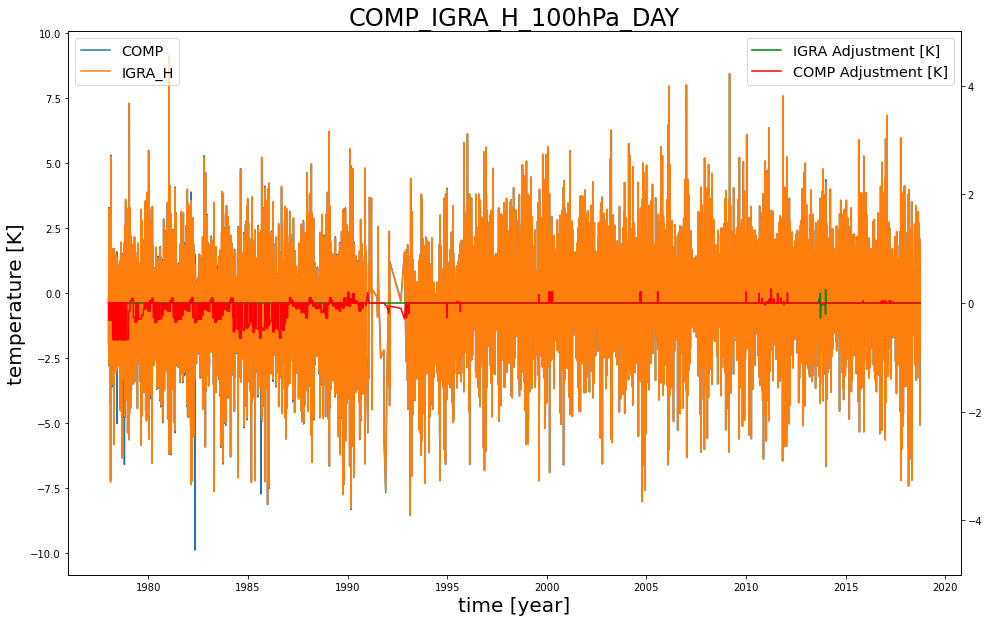

COMP Adjustment MEAN: -0.062219784297179836
COMP Adjustment MIN: -0.672841
COMP Adjustment MAX: 0.25928575
IGRA Adjustment MEAN: -0.00013561169530651736
IGRA Adjustment MIN: -0.2757142857142867
IGRA Adjustment MAX: 0.2507142857142526


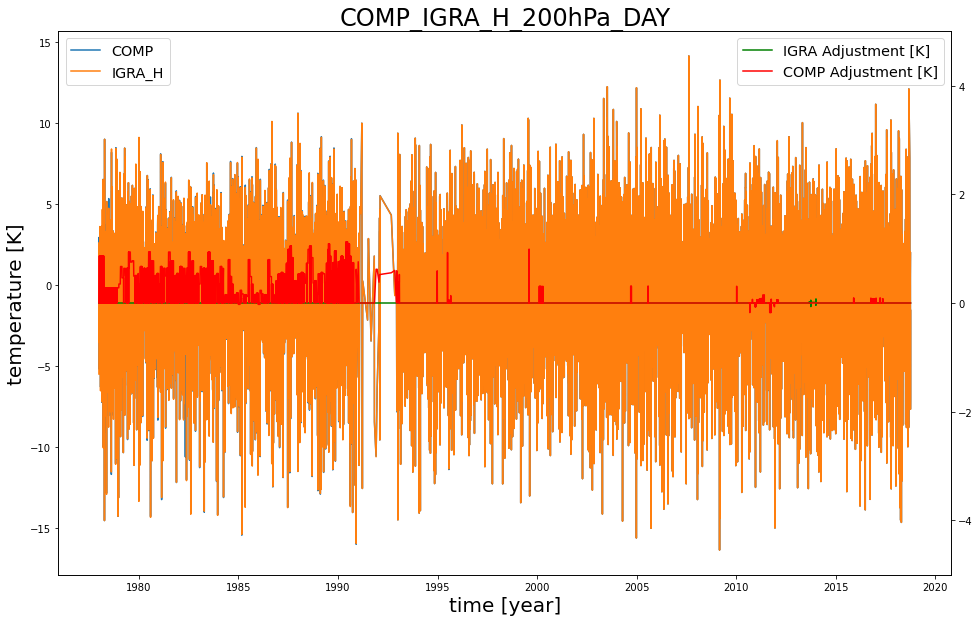

COMP Adjustment MEAN: 0.14924557375468192
COMP Adjustment MIN: -0.17678764
COMP Adjustment MAX: 1.1263538999999998
IGRA Adjustment MEAN: 8.033737480233927e-05
IGRA Adjustment MIN: -0.06571428571430715
IGRA Adjustment MAX: 0.07571428571426964


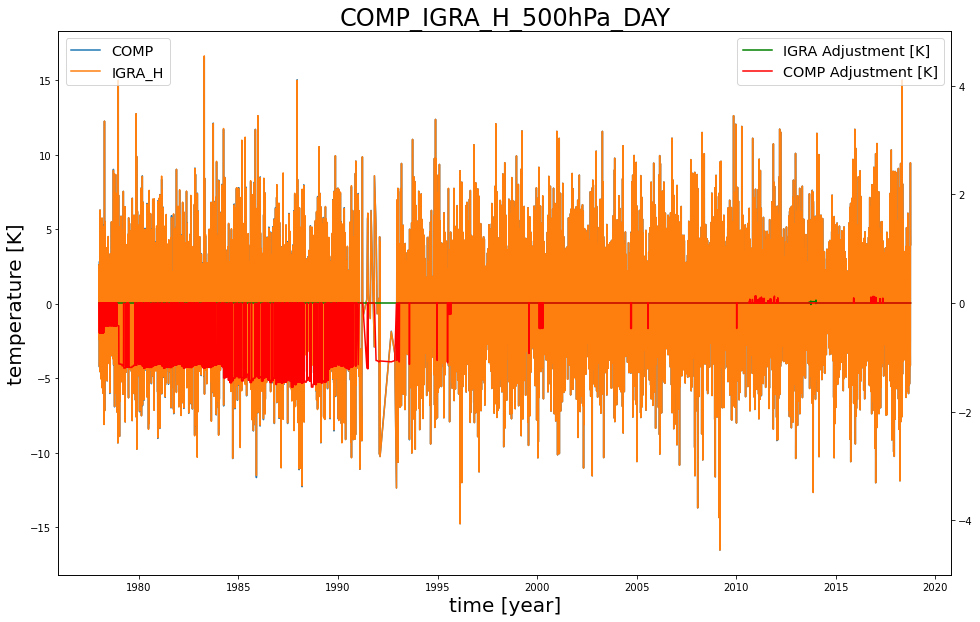

COMP Adjustment MEAN: -0.3601070190941219
COMP Adjustment MIN: -1.5465966
COMP Adjustment MAX: 0.12750438
IGRA Adjustment MEAN: 0.0001789342732739412
IGRA Adjustment MIN: -0.029285714285720132
IGRA Adjustment MAX: 0.05428571428572582


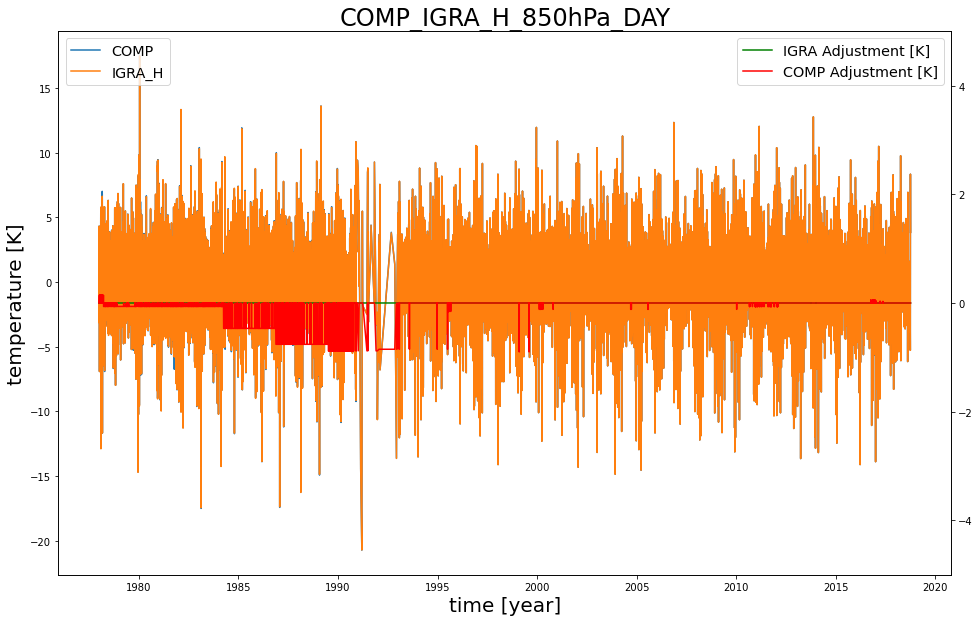

COMP Adjustment MEAN: -0.11096286417848666
COMP Adjustment MIN: -0.9004903000000001
COMP Adjustment MAX: 0.144726
IGRA Adjustment MEAN: 7.244277021023163e-07
IGRA Adjustment MIN: -0.0049999999999954525
IGRA Adjustment MAX: 0.0049999999999954525


In [13]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP')
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H')
    ax2 = ax1.twinx()
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax2.plot(xax, ia, label = 'IGRA Adjustment [K]', c='green')
    ca = np.asarray(c.bias_estimate)
    ax2.plot(xax, ca, label = 'COMP Adjustment [K]', c='red')

    ax2.set_ylim(-5,5)
    ax2.legend(loc='best')

    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP_IGRA_H_'+str(preslist[i])+'hPa_DAY')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))

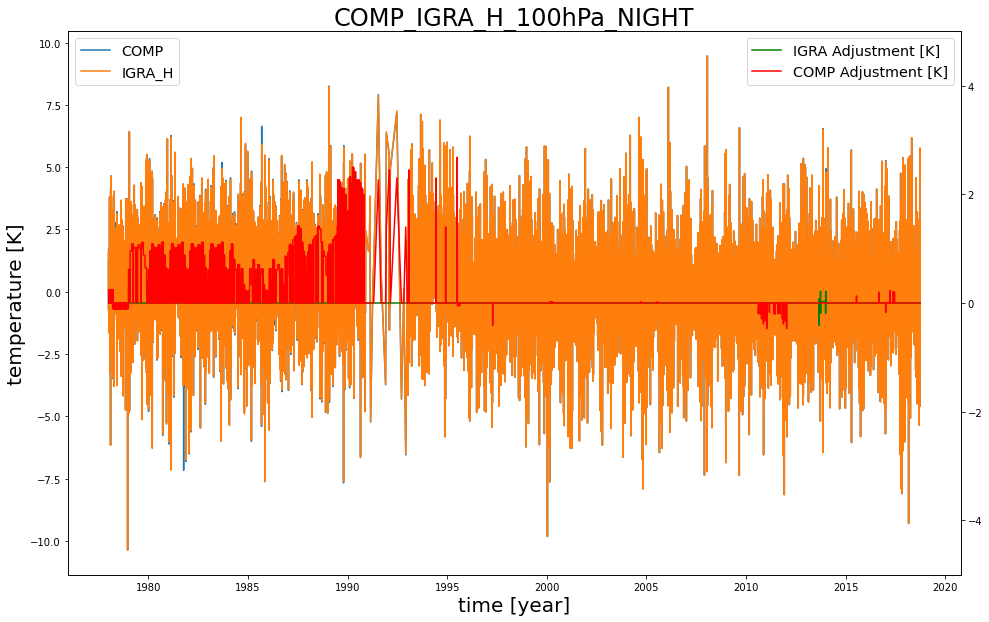

COMP Adjustment MEAN: 0.255089748736233
COMP Adjustment MIN: -0.47165143
COMP Adjustment MAX: 2.6812487000000003
IGRA Adjustment MEAN: 0.0001349052792720056
IGRA Adjustment MIN: -0.411428571428587
IGRA Adjustment MAX: 0.21642857142859384


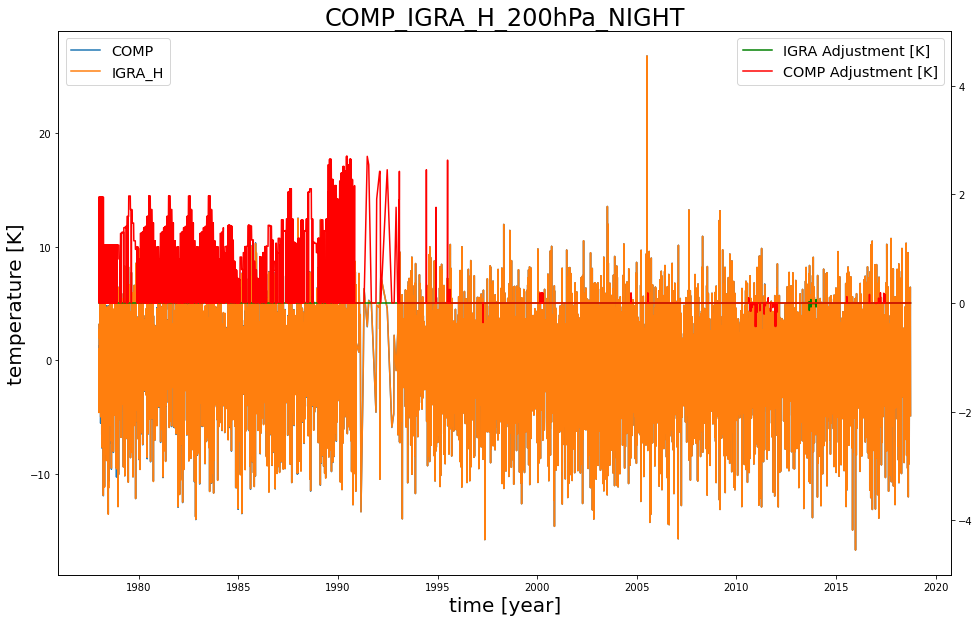

COMP Adjustment MEAN: 0.3776587981574026
COMP Adjustment MIN: -0.43174332
COMP Adjustment MAX: 2.697875
IGRA Adjustment MEAN: -8.014219454993822e-05
IGRA Adjustment MIN: -0.13714285714286234
IGRA Adjustment MAX: 0.06428571428571672


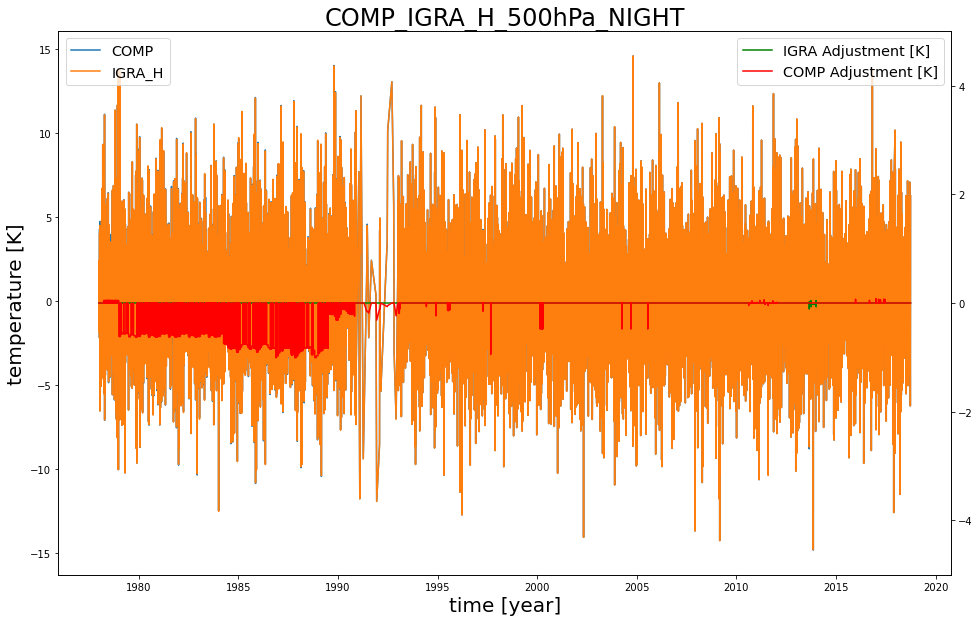

COMP Adjustment MEAN: -0.18605353915820513
COMP Adjustment MIN: -1.0036855
COMP Adjustment MAX: 0.08005932
IGRA Adjustment MEAN: -0.00017896024718494694
IGRA Adjustment MIN: -0.11142857142857565
IGRA Adjustment MAX: 0.045000000000015916


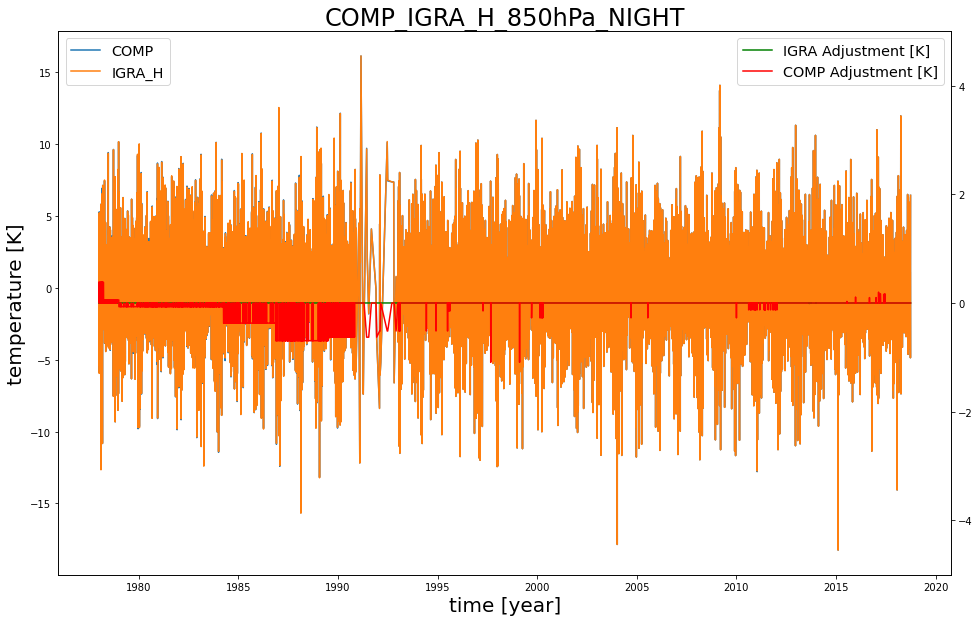

COMP Adjustment MEAN: -0.09029564678307837
COMP Adjustment MIN: -1.0912248
COMP Adjustment MAX: 0.379754
IGRA Adjustment MEAN: -7.25005437525698e-07
IGRA Adjustment MIN: -0.008571428571428896
IGRA Adjustment MAX: 0.00428571428574287


In [14]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP')
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H')
    ax2 = ax1.twinx()
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax2.plot(xax, ia, label = 'IGRA Adjustment [K]', c='green')
    ca = np.asarray(c.bias_estimate)
    ax2.plot(xax, ca, label = 'COMP Adjustment [K]', c='red')

    ax2.set_ylim(-5,5)
    ax2.legend(loc='best')

    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP_IGRA_H_'+str(preslist[i])+'hPa_NIGHT')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))

## Difference:

Finding the difference between the two data sets by subtracting them.

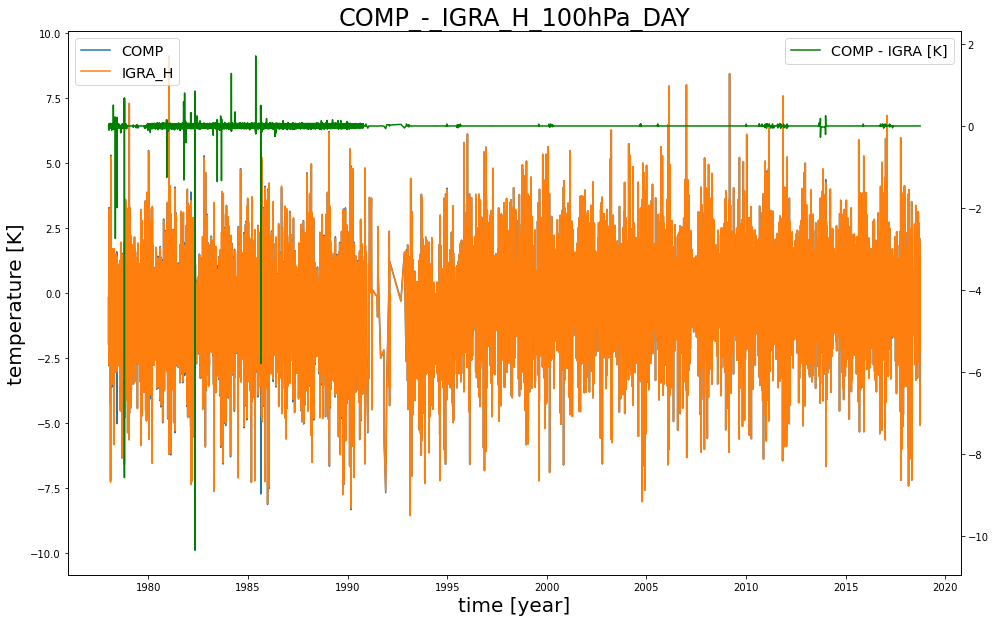

DIFF MEAN: -0.0015243224758484815
DIFF MIN: -10.33571428571426
DIFF MAX: 1.707142857142827


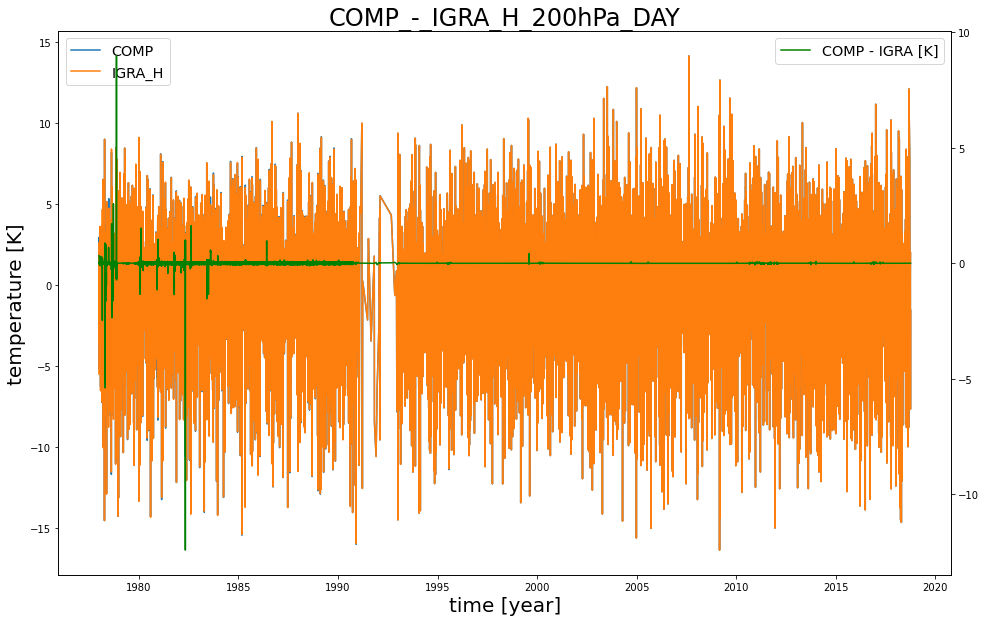

DIFF MEAN: 0.0007397996837109894
DIFF MIN: -12.41428571428574
DIFF MAX: 8.97142857142859


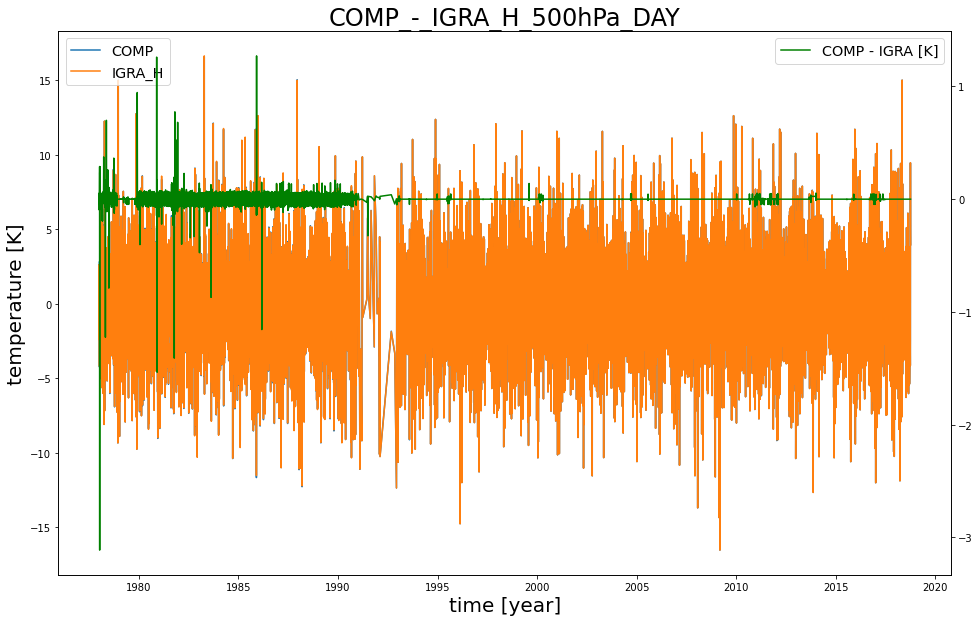

DIFF MEAN: 0.00020407422765929953
DIFF MIN: -3.114285714285728
DIFF MAX: 1.2714285714285154


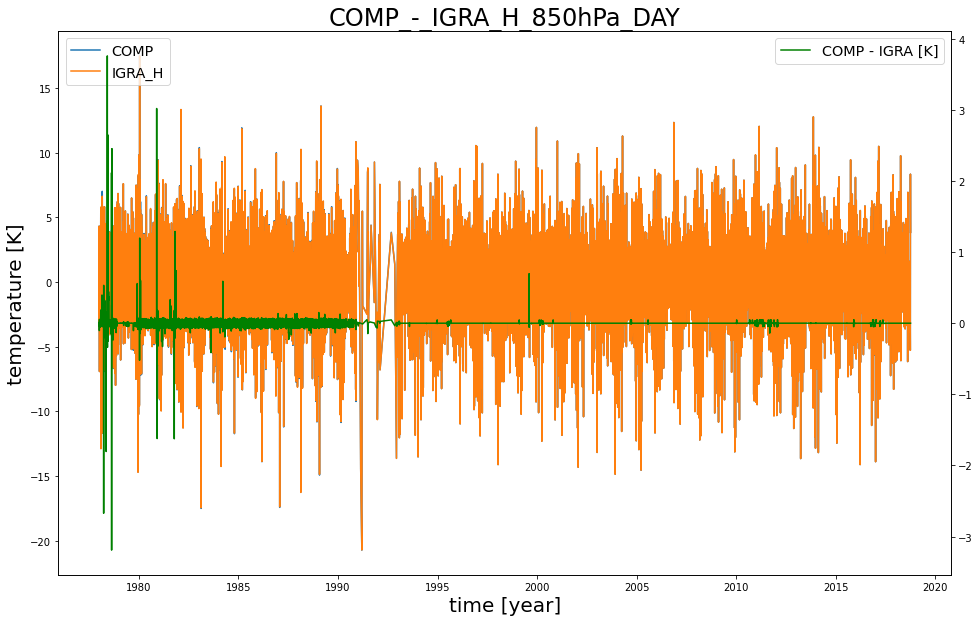

DIFF MEAN: 0.0002744546094302055
DIFF MIN: -3.189285714285745
DIFF MAX: 3.757142857142867


In [15]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP')
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H')
    ax2 = ax1.twinx()
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax2.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax2.legend(loc='best')

    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP_-_IGRA_H_'+str(preslist[i])+'hPa_DAY')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

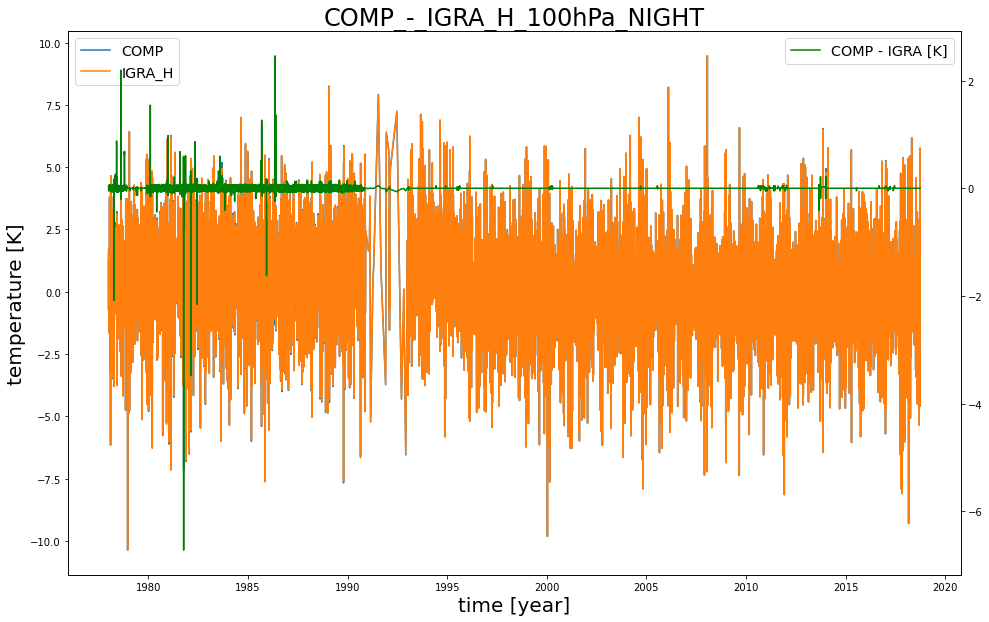

DIFF MEAN: 0.0015169136563691543
DIFF MIN: -6.717857142857099
DIFF MAX: 2.4571428571428555


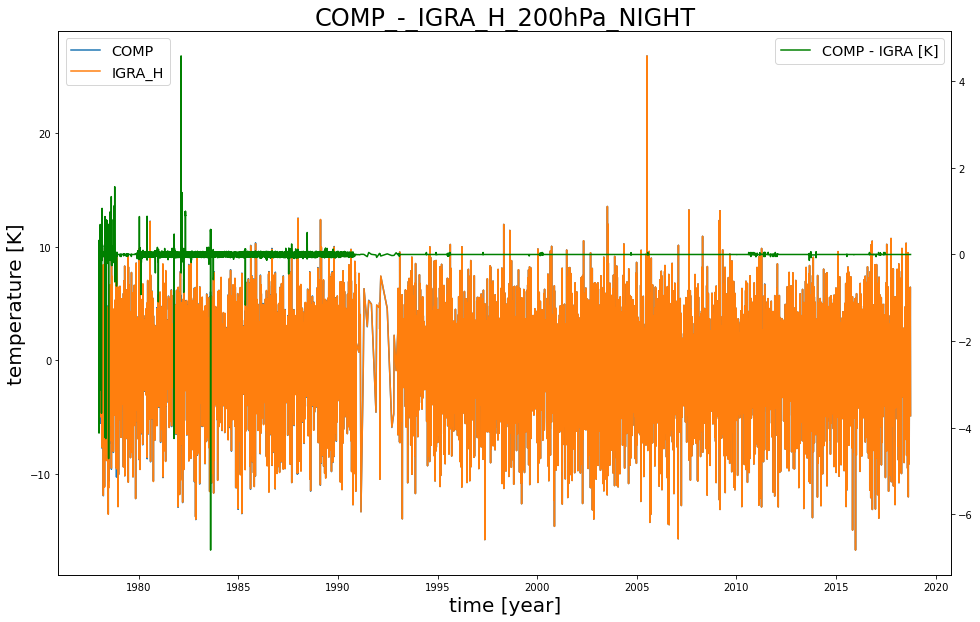

DIFF MEAN: -0.0007879597395904376
DIFF MIN: -6.821428571428555
DIFF MAX: 4.5821428571428555


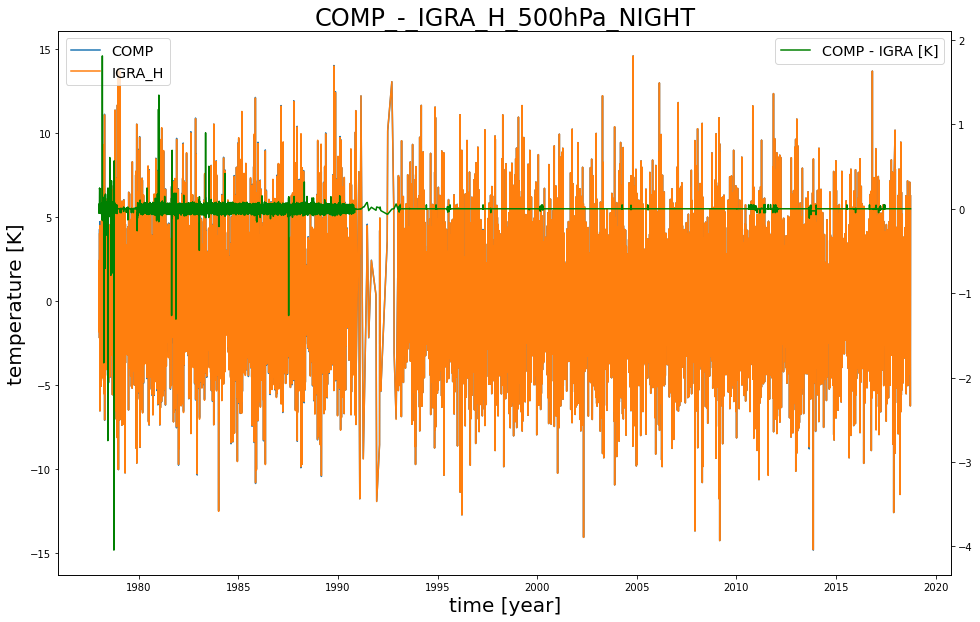

DIFF MEAN: -0.00020358542604149326
DIFF MIN: -4.0428571428571445
DIFF MAX: 1.8107142857142833


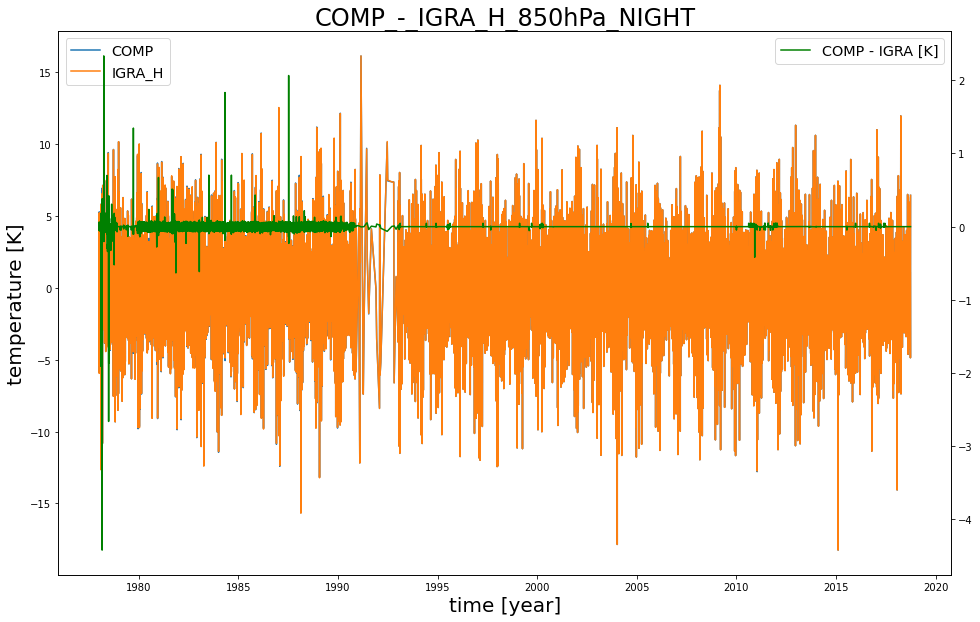

DIFF MEAN: -0.0002808878209442048
DIFF MIN: -4.4178571428571445
DIFF MAX: 2.3321428571428555


In [16]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP')
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H')
    ax2 = ax1.twinx()
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax2.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax2.legend(loc='best')

    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP_-_IGRA_H_'+str(preslist[i])+'hPa_NIGHT')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments

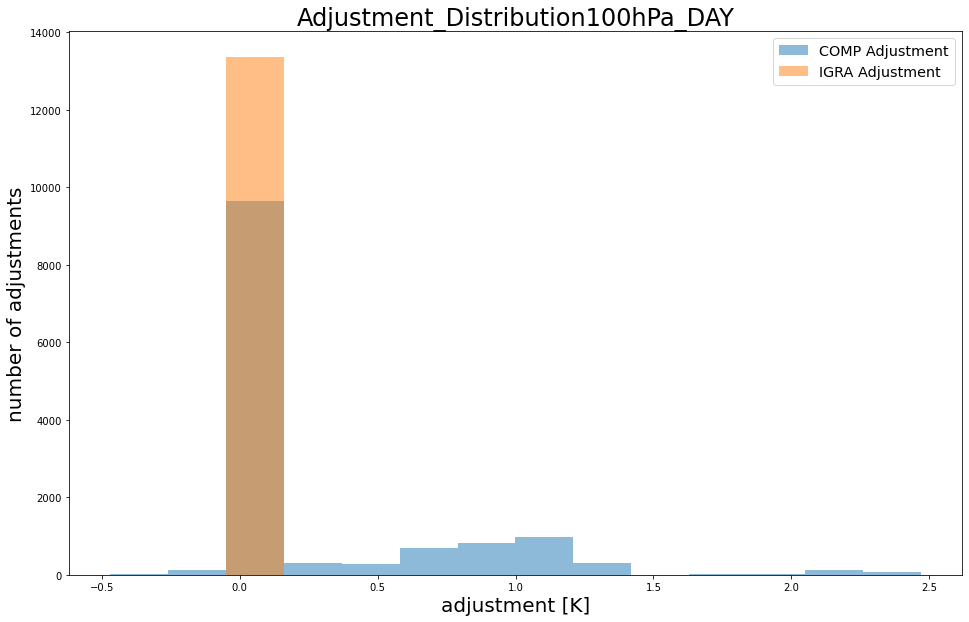

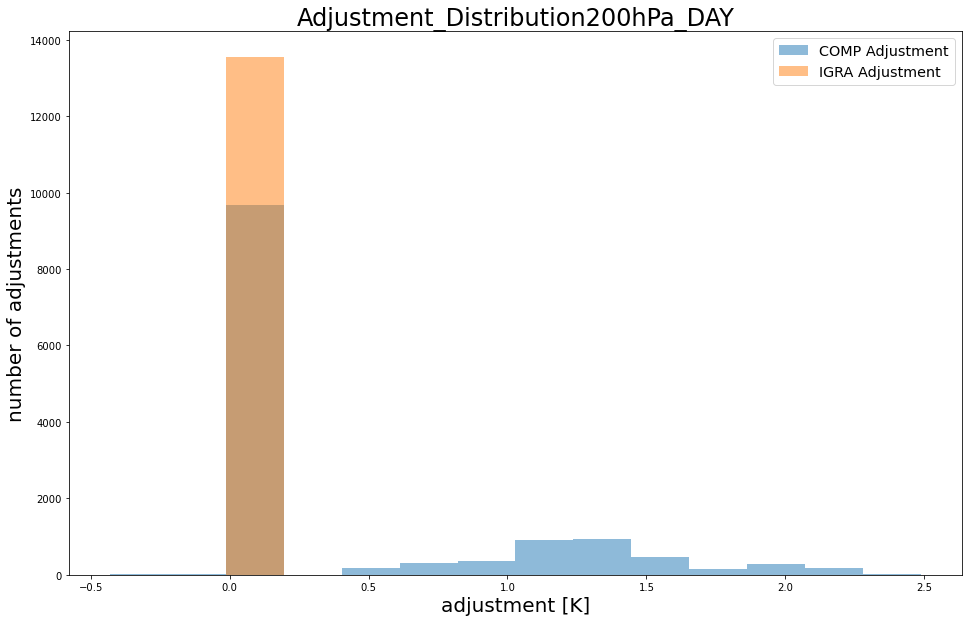

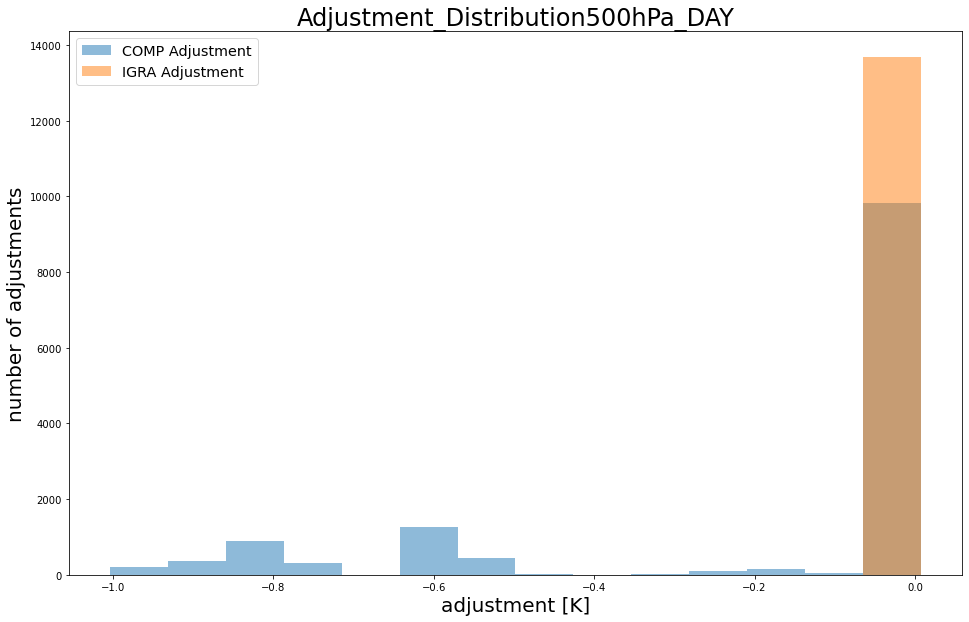

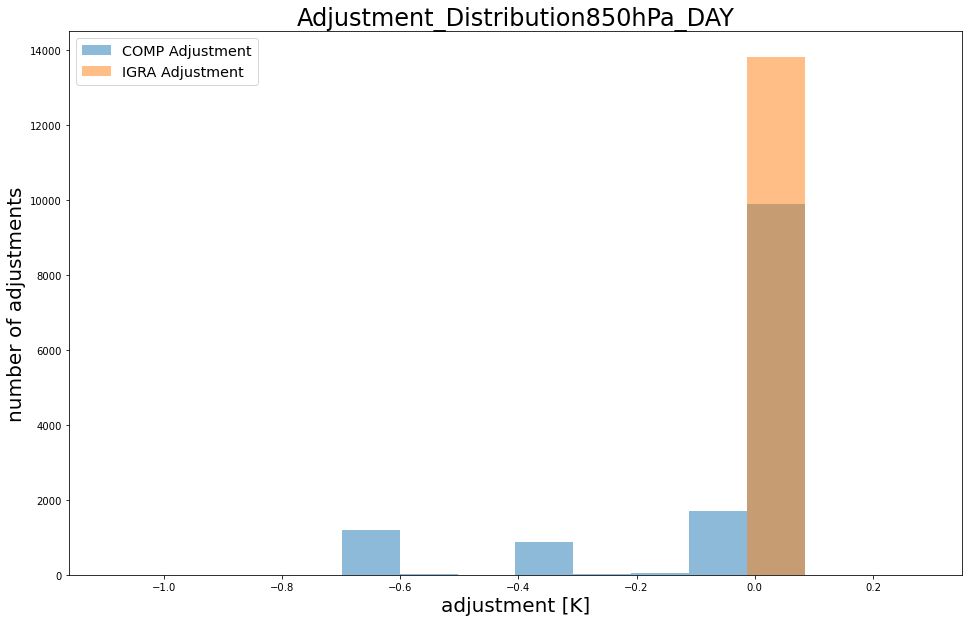

In [17]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if ia.min() < ca.min(): binmin = ia.min()
    else: binmin = ca.min()
    if ia.max() > ca.max(): binmax = ia.max()
    else: binmax = ca.max()
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.5)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.5)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa_DAY')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

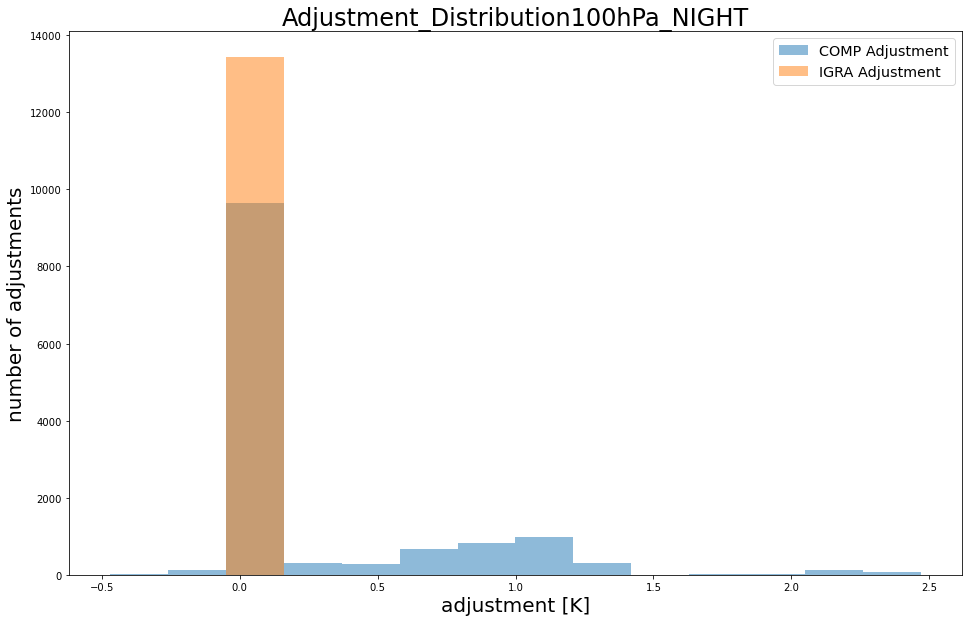

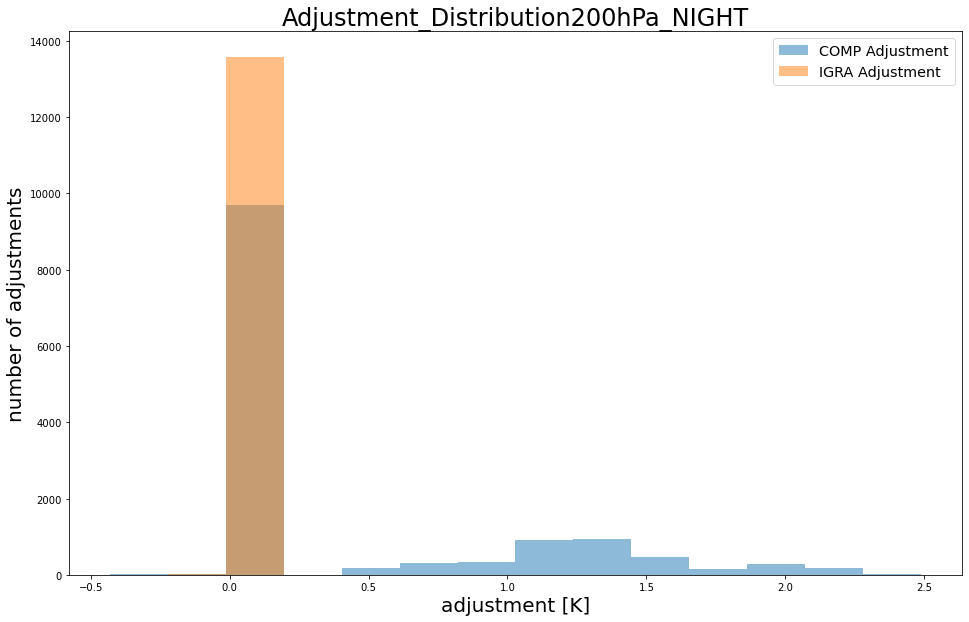

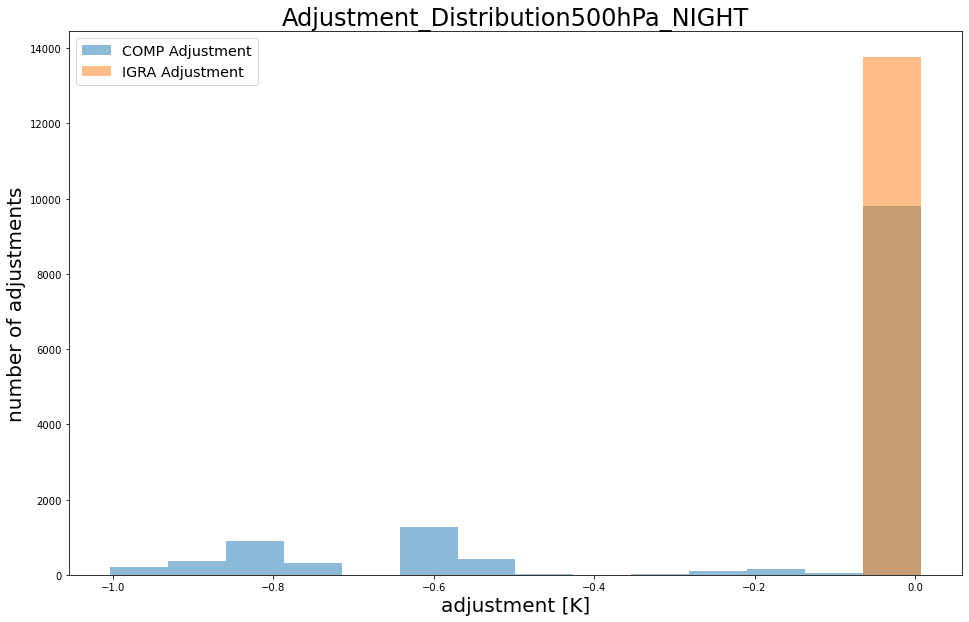

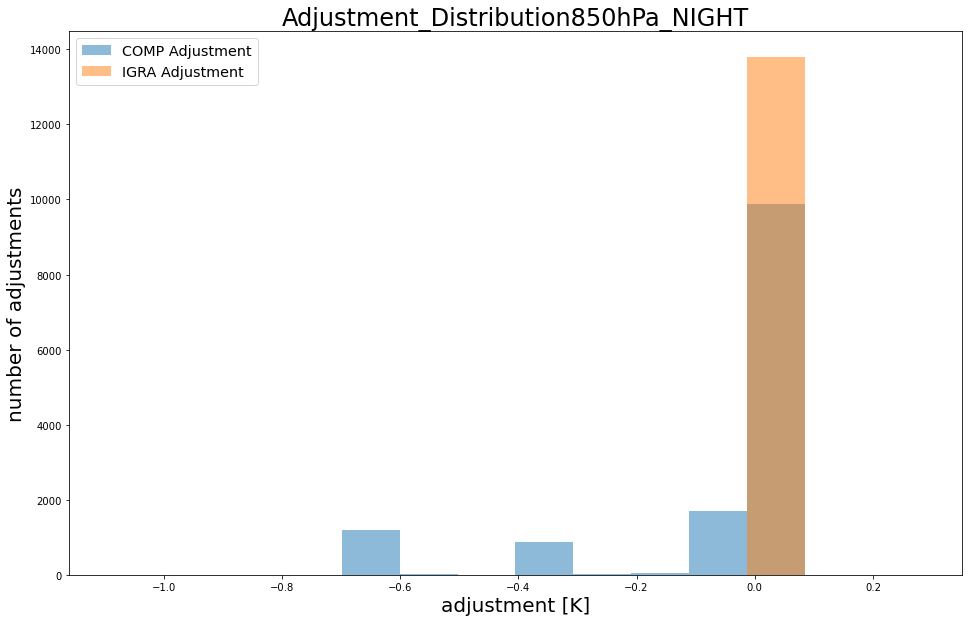

In [18]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if ia.min() < ca.min(): binmin = ia.min()
    else: binmin = ca.min()
    if ia.max() > ca.max(): binmax = ia.max()
    else: binmax = ca.max()
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.5)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.5)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa_NIGHT')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)